# Detecting counterfeit currency

The data set for this comes from the UC Irvine Machine Learning data repository, which hosts a large collection of data sets for use with machine learning algorithms. The original data set for this exercise is available at https://archive.ics.uci.edu/ml/datasets/banknote+authentication#.

The original data set was prepared by taking pictures of both real and fake bank notes and then compressing those images via a wavelet transform. The researchers who prepared the data set then extracted four key features from each compressed input image, and then classified each instance as either a real note or a forged note.

In this program, we try to construct a model that can separate the two classes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank = pd.read_csv("banknote.csv")
bank.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


We now start in on model building. The first step as always is to prepare a training data set and set aside a test set for later.

In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bank,test_size=0.2,random_state=42)

In [4]:
X_train = train_set.drop('class',axis=1)
y_train = train_set['class']
X_test = test_set.drop('class',axis=1)
y_test = test_set['class']
y_train_v = (y_train == 1)
y_test_v = (y_test == 1)

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix

In [6]:
sgd_clf = SGDClassifier(max_iter=5,tol=None,random_state=42)
sgd_clf.fit(X_train, y_train_v)
predictions = sgd_clf.predict(X_train)
confusion_matrix(y_train_v, predictions)

array([[606,   8],
       [  0, 483]], dtype=int64)

In [7]:
y_test_pred = sgd_clf.predict(X_test)
confusion_matrix(y_test_v, y_test_pred)

array([[146,   2],
       [  2, 125]], dtype=int64)

Although the result is 99% correct, the model still can not recognize some input. We will construct a classification model using polynomial regression

# SGDClassifier using polynomial regression

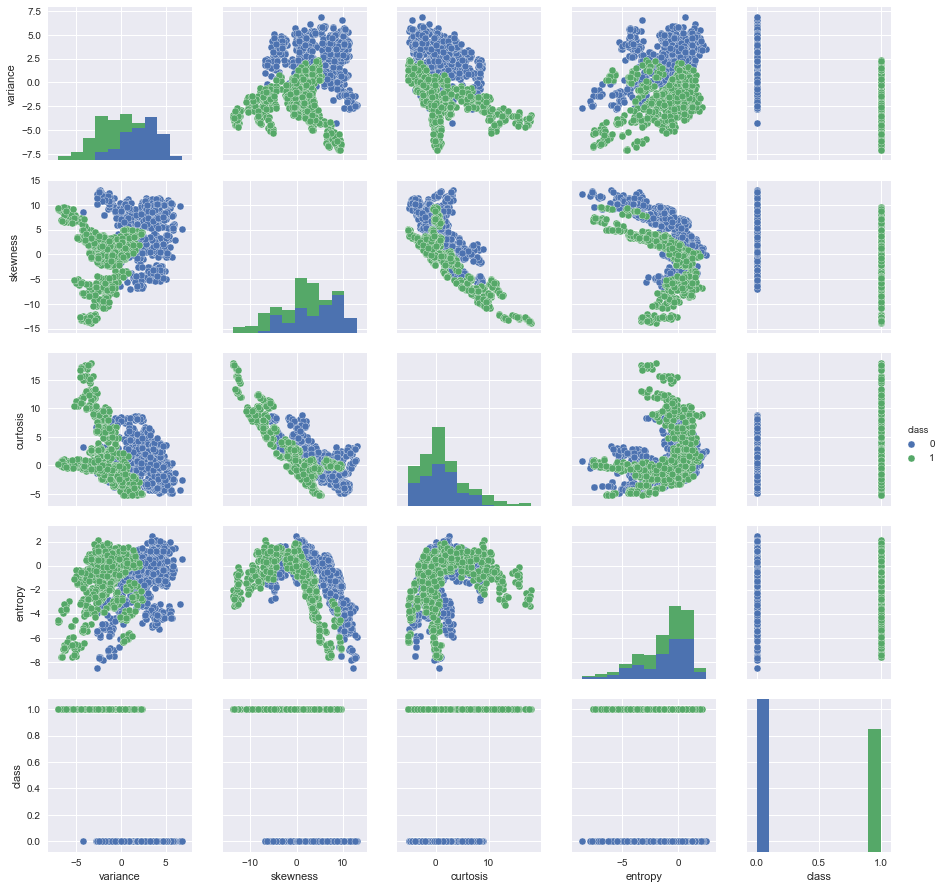

In [8]:
sns.pairplot(bank, hue = "class")

The shape of the plot is similar to the paraboloid; then we use try to use the polynomial of degree 2.

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [35]:
sgd_poly = SGDClassifier(max_iter=10,tol=None,random_state=42)
sgd_poly.fit(X_poly, y_train_v)
predictions = sgd_poly.predict(X_poly)
sgd_poly.coef_,sgd_poly.intercept_

(array([[-255.70748266, -135.87909516, -133.54870081,  -10.47622993,
          -64.31839018, -109.44297177, -343.1104101 ,  276.28896461,
          -64.38528579, -181.23550391,   41.36297637, -126.39074736,
          113.74833371,   -6.75372748]]), array([ 370.86196281]))

In [36]:
confusion_matrix(y_train_v, predictions)

array([[614,   0],
       [  0, 483]], dtype=int64)

The result is perfect. The quadratic polynomial model successfully separate the two classes.

In [37]:
X_test_poly = poly_features.fit_transform(X_test)
y_test_pred = sgd_poly.predict(X_test_poly)
confusion_matrix(y_test_v,y_test_pred)

array([[148,   0],
       [  0, 127]], dtype=int64)

# Ridge Classifier using polynomial regression

In [21]:
from sklearn.linear_model import RidgeClassifier
rg = RidgeClassifier()
rg.fit(X_poly,y_train_v)

rg.coef_,rg.intercept_

(array([[-0.37324445, -0.23531977, -0.34017479,  0.05675664,  0.01690265,
          0.02909633,  0.02399407,  0.01348705,  0.00596586,  0.02391776,
         -0.01363201,  0.02203954, -0.00067886, -0.00917126]]),
 array([ 0.49948401]))

The coeffiecient and interception are much smaller than them while we use SGDClassifier. Therefore, RidgeClassifier can compute much faster.

In [38]:
pred = rg.predict(X_poly)
confusion_matrix(y_train_v,pred)

array([[614,   0],
       [  0, 483]], dtype=int64)

In [39]:
y_test_pred = rg.predict(X_test_poly)
confusion_matrix(y_test_v,y_test_pred)

array([[148,   0],
       [  0, 127]], dtype=int64)

Through this work, we build a quadratic model which can successfully separate the two classes.